## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [13]:
import torch
import torch.nn as nn
from collections import OrderedDict


In [14]:
# your code here

model1 = nn.Sequential(OrderedDict([
    ('hidden_net', nn.Linear(2,32)),
    ('hidden_act', nn.Sigmoid()),
    ('output_net', nn.Linear(32,2)),
    ('output_act', nn.Sigmoid())
]))
model2 = nn.Sequential(OrderedDict([
    ('hidden_net', nn.Linear(2,8)),
    ('hidden_act', nn.ReLU()),
    ('output_net', nn.Linear(8,2)),
    ('output_act', nn.Sigmoid())
]))
model3 = nn.Sequential(OrderedDict([
    ('hidden_net', nn.Linear(2,16)),
    ('hidden_act', nn.Sigmoid()),
    ('output_net', nn.Linear(16,2)),
    ('output_act', nn.Sigmoid())
]))

print(model1)
print(model2)
print(model3)


Sequential(
  (hidden_net): Linear(in_features=2, out_features=32, bias=True)
  (hidden_act): Sigmoid()
  (output_net): Linear(in_features=32, out_features=2, bias=True)
  (output_act): Sigmoid()
)
Sequential(
  (hidden_net): Linear(in_features=2, out_features=8, bias=True)
  (hidden_act): ReLU()
  (output_net): Linear(in_features=8, out_features=2, bias=True)
  (output_act): Sigmoid()
)
Sequential(
  (hidden_net): Linear(in_features=2, out_features=16, bias=True)
  (hidden_act): Sigmoid()
  (output_net): Linear(in_features=16, out_features=2, bias=True)
  (output_act): Sigmoid()
)


In [15]:
# your code here
#data_in = torch.tensor( ...
#contains all the possible combinations of bits(0, 1)

data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [16]:
# your code here
# data_target = torch.tensor( ...
data_target = torch.tensor([[0, 0], [0, 1], [0, 1], [1, 0]], dtype=torch.float)
print(data_target)

tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]])


In [17]:
# your code here

criterion = nn.MSELoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.01)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.01)

In [18]:
# your code here
# train

num_epochs=100

def train(model, inputs, outputs, criterion, optimizer):
    loss_values = []
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        loss = criterion(model(inputs), outputs)
        loss.backward()
        optimizer.step()
        loss_values.append(loss.item())
    return loss_values

accuracies=[]
loss_values_model1 = train(model1, data_in, data_target, criterion, optimizer1)
loss_values_model2 = train(model2, data_in, data_target, criterion, optimizer2)
loss_values_model3 = train(model3, data_in, data_target, criterion, optimizer3)

for model in [model1, model2, model3]:
    outputs = model(data_in)
    predicted = (outputs >=0.5).float()
    print(predicted)
    accuracy = (predicted == data_target).float().mean()
    accuracies.append(accuracy)
    print(f'Training Accuracy: {accuracy.item()*100}')

tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 1.]])
Training Accuracy: 87.5
tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]])
Training Accuracy: 100.0
tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 1.]])
Training Accuracy: 87.5


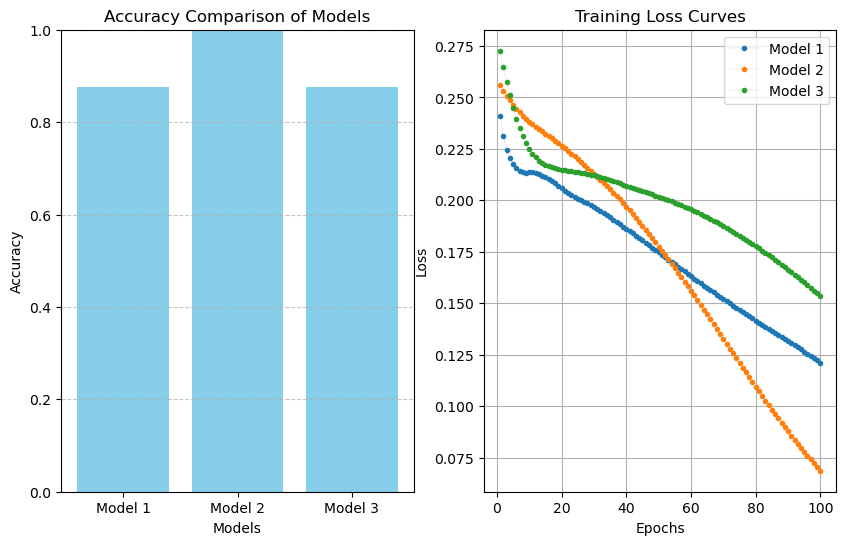

In [19]:
# your code here
# visualize the resuts
import matplotlib.pyplot as plt


# Plotting the bar chart for accuracies
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(['Model 1', 'Model 2', 'Model 3'], accuracies, color='skyblue')
plt.title('Accuracy Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Epochs
epochs = range(1, num_epochs + 1)  # Use all epochs from 1 to num_epochs

# Plotting the training loss curves
plt.subplot(1, 2, 2)
plt.plot(epochs, loss_values_model1, label='Model 1', marker='.', linewidth=0.1)
plt.plot(epochs, loss_values_model2, label='Model 2', marker='.', linewidth=0.1)
plt.plot(epochs, loss_values_model3, label='Model 3', marker='.', linewidth=0.1)
plt.title('Training Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [21]:
# your code here
# print model wights

for name, param in model2.named_parameters():
        if 'weight' in name:
            print(f"Layer: {name}, Size: {param.size()}")
            print(param)

Layer: hidden_net.weight, Size: torch.Size([8, 2])
Parameter containing:
tensor([[-0.8131, -0.8132],
        [-0.0081, -0.4114],
        [-0.3050,  0.0315],
        [ 0.7185, -0.2735],
        [-0.9174,  0.9158],
        [ 0.2115,  0.2029],
        [-0.2130,  0.3951],
        [ 1.1282,  1.5292]], requires_grad=True)
Layer: output_net.weight, Size: torch.Size([2, 8])
Parameter containing:
tensor([[-0.8009, -0.0053, -0.0895, -0.2125, -0.9810,  0.0415,  0.2551,  1.2506],
        [-1.5350, -0.0264, -0.0863,  0.5396,  1.3172, -0.0777,  0.2461, -1.2557]],
       requires_grad=True)
